In [1]:
import numpy as np
import pandas as pd


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('C:/Users/maity/OneDrive/Desktop/darkArmy/africa.csv')

In [4]:
data.sample(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
834,63,TUN,Tunisia,1952,0,349.500000,0,0,0.0,7.006178,0,0,0,no_crisis
927,69,ZMB,Zambia,1973,0,0.000643,0,0,0.0,6.493506,1,0,0,no_crisis
947,69,ZMB,Zambia,1993,0,0.561000,0,1,0.0,183.263000,1,1,1,no_crisis
169,10,CAF,Central African Republic,1964,0,245.004827,0,0,0.0,10.055096,1,0,0,no_crisis
782,56,ZAF,South Africa,1974,0,0.667800,0,0,0.0,13.812239,1,0,0,no_crisis


In [5]:
unique_countries = data.country.unique()
unique_countries

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

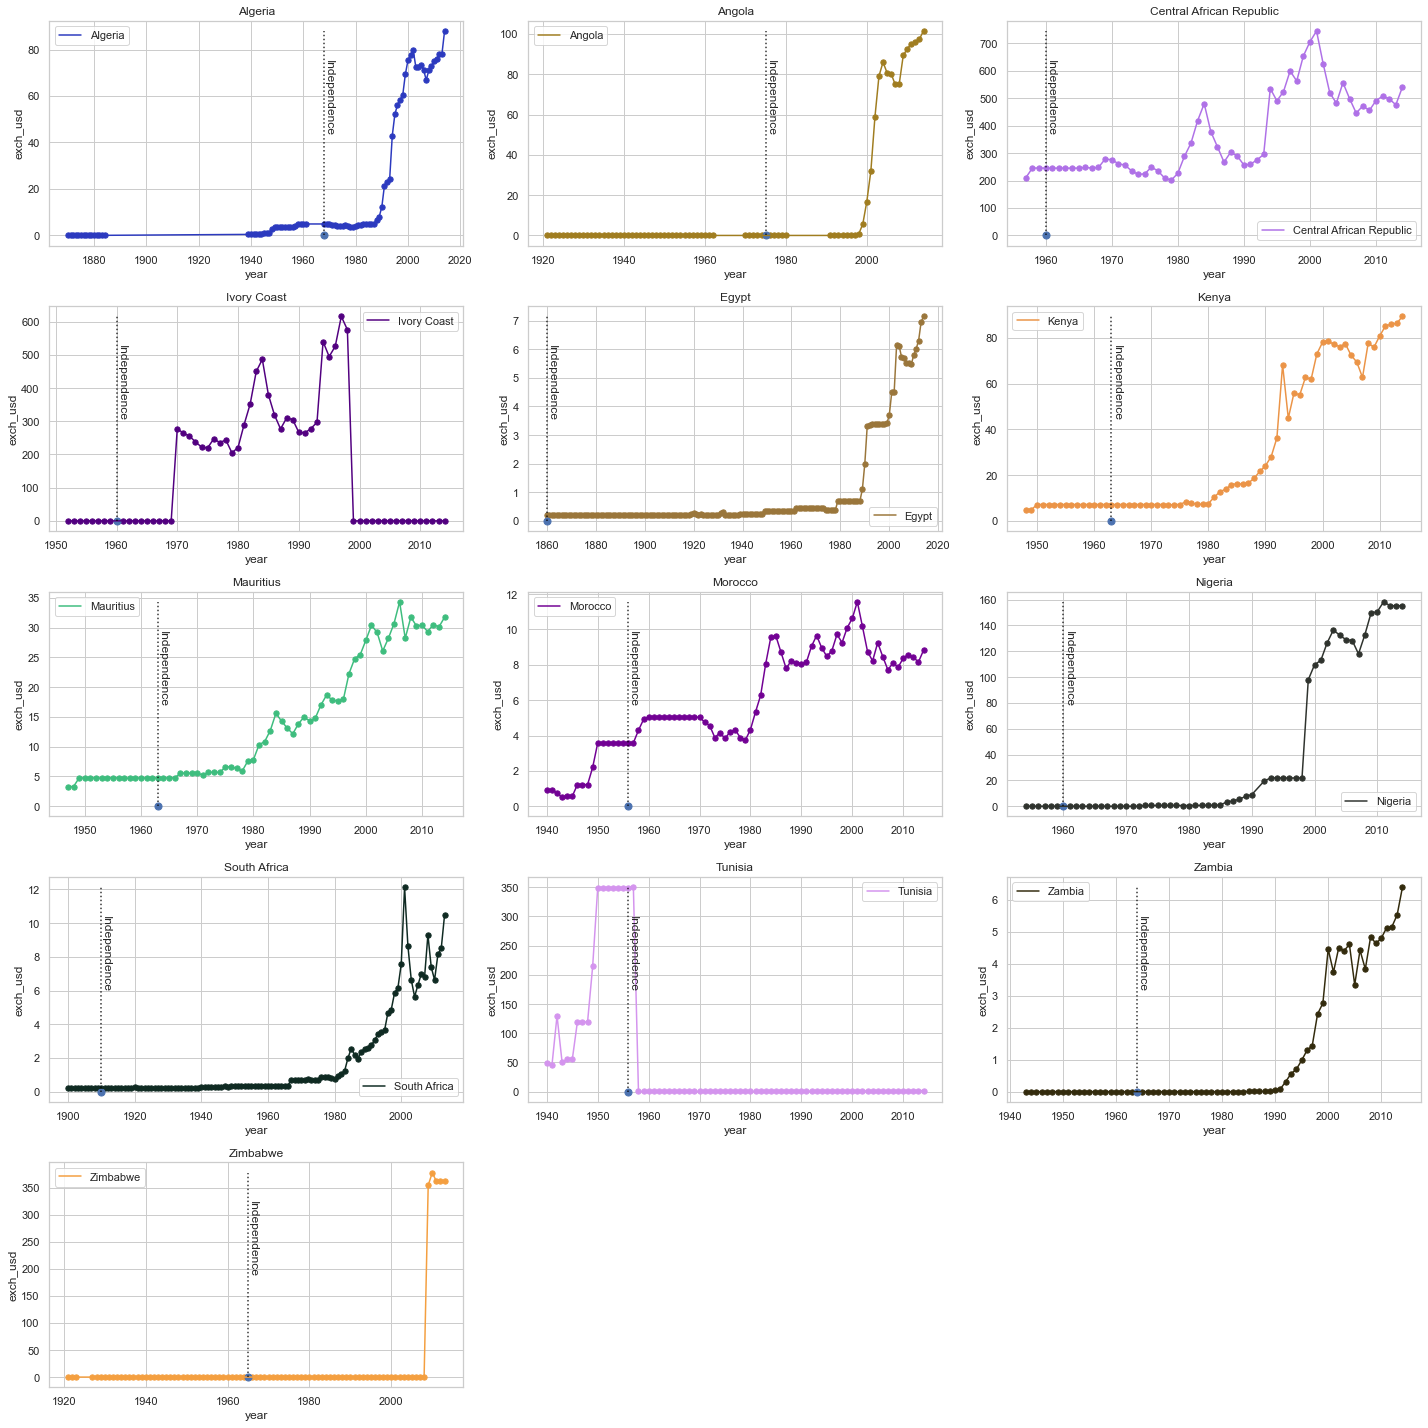

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(data[data.country==country]['year'],
                 data[data.country==country]['exch_usd'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [0,
              np.max(data[data.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

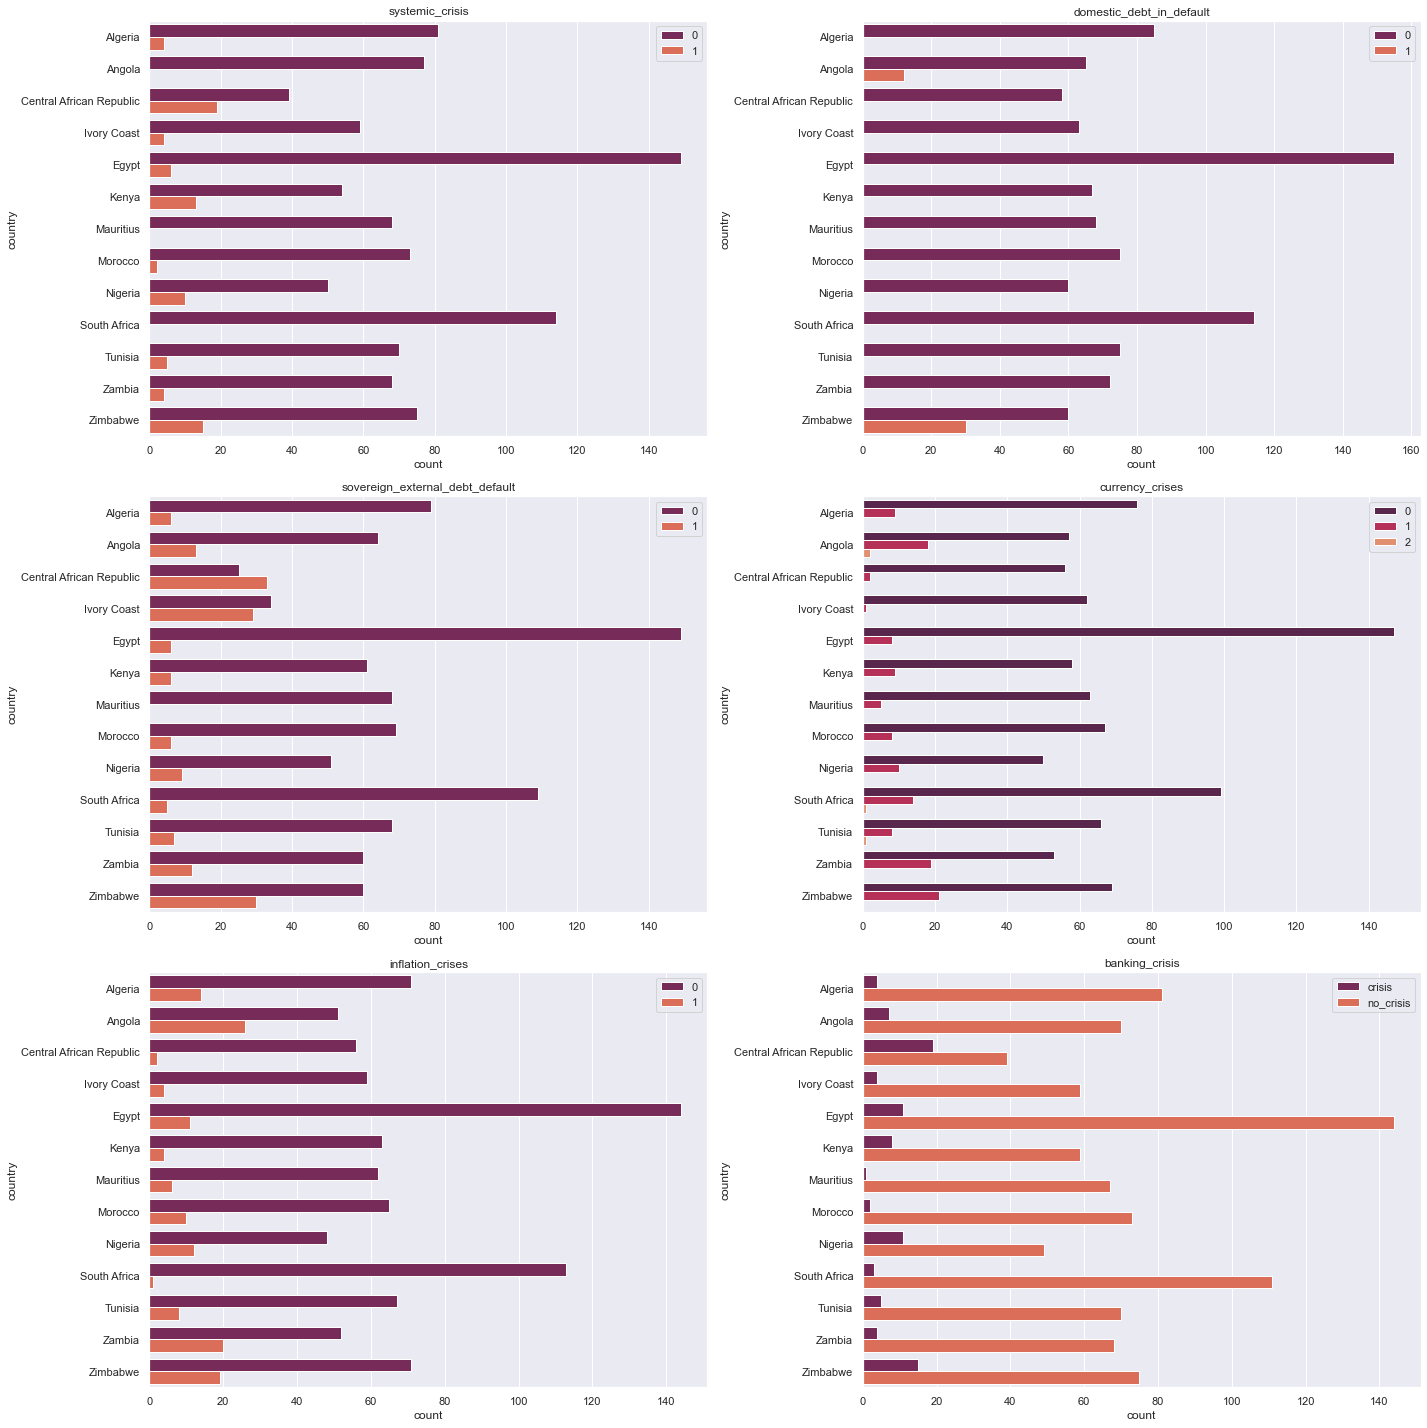

In [16]:
sns.set(style = 'darkgrid')
cols = ['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count = 1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y= data.country,hue = data[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

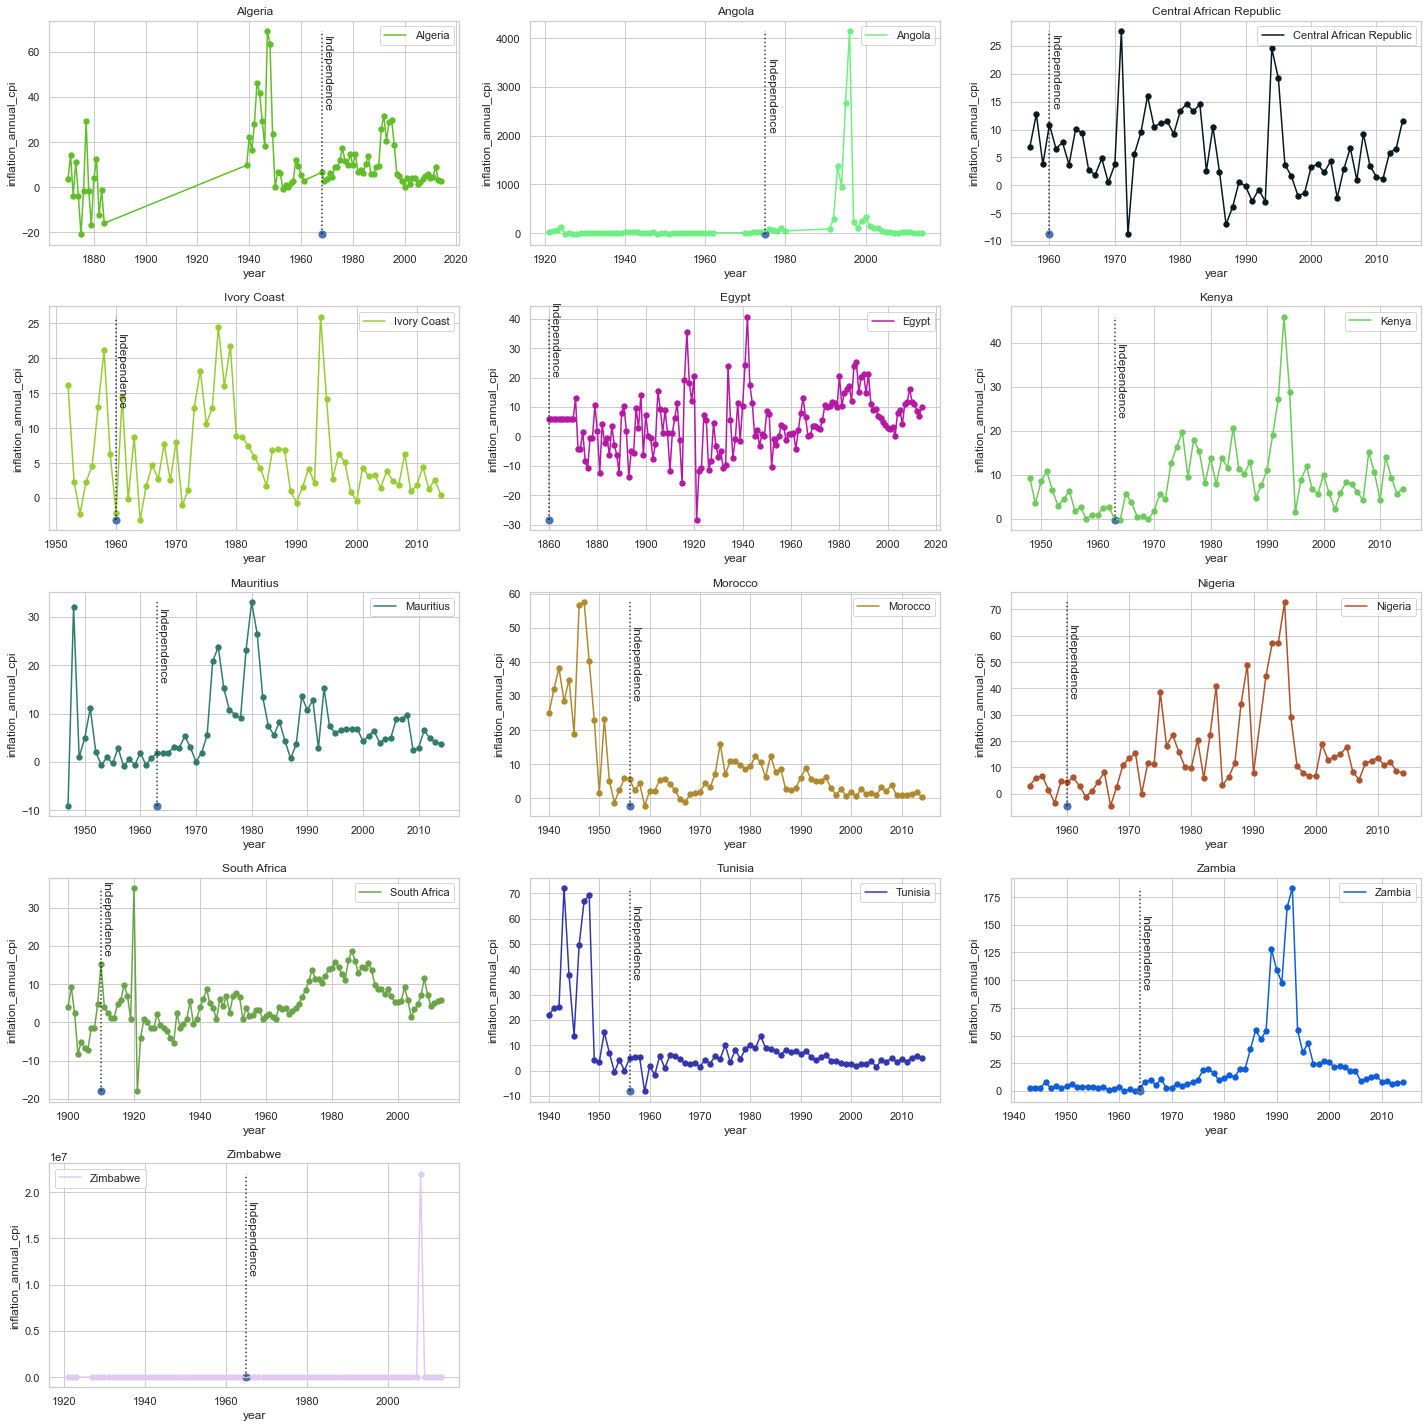

In [17]:
###AVERAGE YEARWISE INFLATION
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in unique_countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(data[data.country==country]['year'],
                 data[data.country==country]['inflation_annual_cpi'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['inflation_annual_cpi'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [np.min(data[data.country==country]['inflation_annual_cpi']),
              np.max(data[data.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=np.min(data[data.country==country]['inflation_annual_cpi']),
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()


<AxesSubplot:>

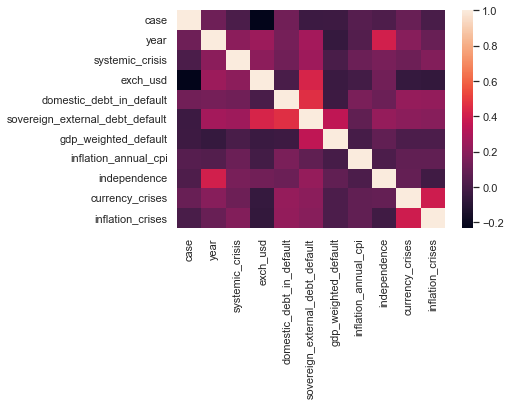

In [18]:
sns.heatmap(data.corr())